# Lab 2 

### 1) e 2)

In [131]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
X = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]

out_and = [0, 0, 0, 1]

w0 = random.uniform(-0.5, 0.5)
w1 = random.uniform(-0.5, 0.5)
w2 = random.uniform(-0.5, 0.5 )
print(f"Weights: w0={w0}, w1={w1}, w2={w2}")

def f(s):
    if s > 0.5:
        return 1
    else:
        return 0


Weights: w0=0.16899091034099623, w1=-0.37105214911736406, w2=0.20209514442230558


In [3]:
o = []

for input in X:
    s = w0 + w1 * input[0] + w2 * input[1]
    y = f(s)

    o.append(y)

print(o)

[0, 0, 0, 0]


### 3)

In [4]:
#Erro 
e = []
for i in range(len(out_and)):
    e.append(out_and[i] - o[i])

print("Erro (d - o):", e)

Erro (d - o): [0, 0, 0, 1]


### 4), 5) e 6)


Época 1
Weights: w0=0.286184598581243, w1=-0.03699905941108095, w2=0.18238746788322635
Erro total nesta época: 1

Época 2
Weights: w0=0.296184598581243, w1=-0.026999059411080946, w2=0.19238746788322636
Erro total nesta época: 1

Época 3
Weights: w0=0.30618459858124303, w1=-0.016999059411080944, w2=0.20238746788322637
Erro total nesta época: 2

Época 4
Weights: w0=0.30618459858124303, w1=-0.006999059411080944, w2=0.20238746788322637
Erro total nesta época: 2

Época 5
Weights: w0=0.30618459858124303, w1=0.0030009405889190564, w2=0.20238746788322637
Erro total nesta época: 2

Época 6
Weights: w0=0.30618459858124303, w1=0.013000940588919057, w2=0.20238746788322637
Erro total nesta época: 1

Época 7
Weights: w0=0.296184598581243, w1=0.013000940588919057, w2=0.19238746788322636
Erro total nesta época: 0
Rede aprendeu o padrão completo!7

Pesos finais:
w0 = 0.29618, w1 = 0.01300, w2 = 0.19239


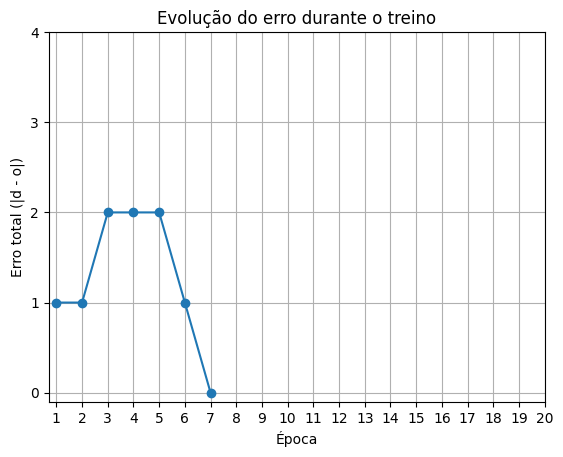

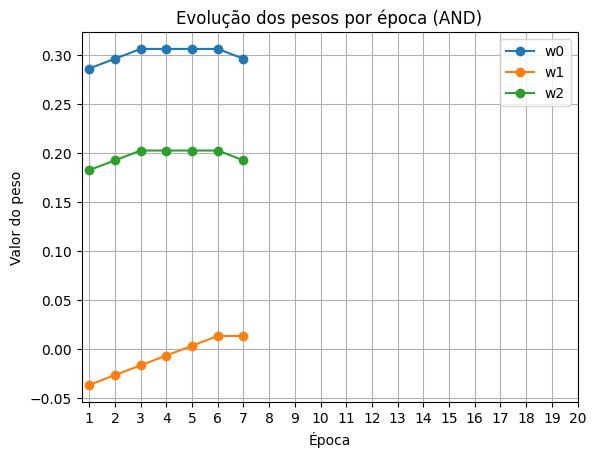

In [94]:
# Taxa de aprendizagem
alpha = 1e-2

w0 = random.uniform(-0.5, 0.5)
w1 = random.uniform(-0.5, 0.5)
w2 = random.uniform(-0.5, 0.5)

# Número de épocas
epocas = 20
e = []
w_hist = []

for epoca in range(epocas):
    total_erro = 0
    print(f"\nÉpoca {epoca+1}")
    
    w_hist.append((w0, w1, w2))
    print(f"Weights: w0={w0}, w1={w1}, w2={w2}")

    for i, input in enumerate(X):
        s = w0 + w1 * input[0] + w2 * input[1]
        #print(f"Resultado pré f():{s}")
        y = f(s)
        #print(f"Resultado:{y}")

        # Cálculo do erro
        erro = out_and[i] - y
        #print(f"out_and:{out_and[i]}    y:{y}    Erro:{erro}")
        
        total_erro += abs(erro)

        # Atualização dos pesos
        w0 = w0 + alpha * erro
        w1 = w1 + alpha * erro * input[0]
        w2 = w2 + alpha * erro * input[1]
        
    e.append(total_erro)
    

    print(f"Erro total nesta época: {total_erro}")
    if total_erro == 0:
        print("Rede aprendeu o padrão completo!"+ str(epoca+1))

        break

print("\nPesos finais:")
print(f"w0 = {w0:.5f}, w1 = {w1:.5f}, w2 = {w2:.5f}")

#(a) Plot erro por época

plt.plot(range(1, len(e) + 1), e, marker='o')
plt.xticks(range(1, epocas + 1, 1))
plt.yticks(range(5))
plt.xlabel("Época")
plt.ylabel("Erro total (|d - o|)")
plt.title("Evolução do erro durante o treino")
plt.grid(True)
plt.show()

#(b) Plot pesos por época
w0_list = [w[0] for w in w_hist]
w1_list = [w[1] for w in w_hist]
w2_list = [w[2] for w in w_hist]

plt.plot(range(1, len(w0_list)+1), w0_list, label='w0', marker='o')
plt.plot(range(1, len(w1_list)+1), w1_list, label='w1', marker='o')
plt.plot(range(1, len(w2_list)+1), w2_list, label='w2', marker='o')
plt.xticks(range(1, epocas + 1, 1))
plt.title("Evolução dos pesos por época (AND)")
plt.xlabel("Época")
plt.ylabel("Valor do peso")
plt.legend()
plt.grid(True)
plt.show()


### 6)(c)

Aumentar o parametro α aumenta a velocidade de convergência, mas um aumento muito elevado resulta em instablidade dos valores dos pesos.
Ao testarmos alguns valores do α manualmente, concluímos que 1e-1 parece-nos que é aproximadamente o melhor valor, pois confere uma convergência rápida e uma boa establidade nos valores de erro.

### 6)(d)

In [121]:
def treinar(alpha=1e-3, epocas=20):
    w0 = random.uniform(-0.5, 0.5)
    w1 = random.uniform(-0.5, 0.5)
    w2 = random.uniform(-0.5, 0.5)

    e = []
    w_hist = []

    for epoca in range(epocas):
        total_erro = 0
        #print(f"\nÉpoca {epoca+1}")
        
        w_hist.append((w0, w1, w2))
        #print(f"Weights: w0={w0}, w1={w1}, w2={w2}")

        for i, input in enumerate(X):
            s = w0 + w1 * input[0] + w2 * input[1]
            #print(f"Resultado pré f():{s}")
            y = f(s)
            #print(f"Resultado:{y}")

            # Cálculo do erro
            erro = out_and[i] - y
            #print(f"out_and:{out_and[i]}    y:{y}    Erro:{erro}")
            
            total_erro += abs(erro)

            # Atualização dos pesos
            w0 = w0 + alpha * erro
            w1 = w1 + alpha * erro * input[0]
            w2 = w2 + alpha * erro * input[1]
            
        e.append(total_erro)
        

        #print(f"Erro total nesta época: {total_erro}")
        if total_erro == 0:
            print("Rede aprendeu o padrão completo!"+ str(epoca+1))
            return epoca + 1
            

    print("\nPesos finais:")    
    print(f"w0 = {w0:.5f}, w1 = {w1:.5f}, w2 = {w2:.5f}")
    return epocas


In [130]:
# Repetições
repeticoes = 30
resultados = []

for _ in range(repeticoes):
    epocas = treinar(1e-1, 20)
    print(f"Convergência em {epocas} épocas.")
    resultados.append(epocas)

# Média e desvio-padrão
media = sum(resultados) / len(resultados)
variancia = sum((x - media)**2 for x in resultados) / len(resultados)
dp = math.sqrt(variancia)

print("\nResultados das 20 execuções:", resultados)
print(f"Média de épocas até convergência: {media:.2f}")
print(f"Desvio-padrão: {dp:.2f}")

Rede aprendeu o padrão completo!3
Convergência em 3 épocas.
Rede aprendeu o padrão completo!4
Convergência em 4 épocas.
Rede aprendeu o padrão completo!8
Convergência em 8 épocas.
Rede aprendeu o padrão completo!6
Convergência em 6 épocas.
Rede aprendeu o padrão completo!7
Convergência em 7 épocas.
Rede aprendeu o padrão completo!5
Convergência em 5 épocas.
Rede aprendeu o padrão completo!8
Convergência em 8 épocas.
Rede aprendeu o padrão completo!4
Convergência em 4 épocas.
Rede aprendeu o padrão completo!3
Convergência em 3 épocas.
Rede aprendeu o padrão completo!7
Convergência em 7 épocas.
Rede aprendeu o padrão completo!3
Convergência em 3 épocas.
Rede aprendeu o padrão completo!3
Convergência em 3 épocas.
Rede aprendeu o padrão completo!2
Convergência em 2 épocas.
Rede aprendeu o padrão completo!7
Convergência em 7 épocas.
Rede aprendeu o padrão completo!8
Convergência em 8 épocas.
Rede aprendeu o padrão completo!9
Convergência em 9 épocas.
Rede aprendeu o padrão completo!7
Conver

### 7)

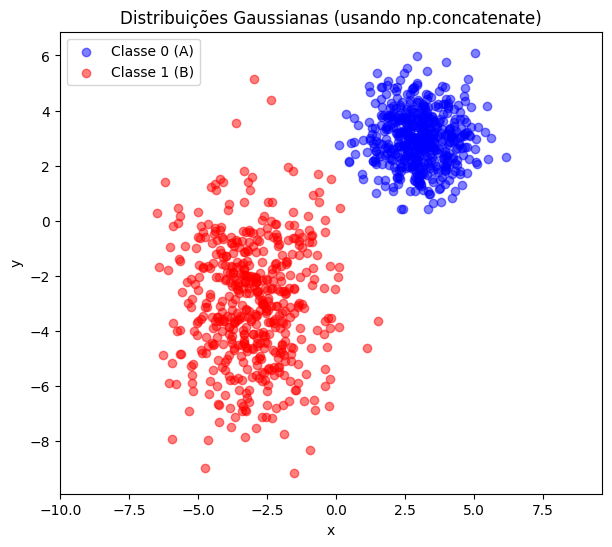

Forma final de c: (1000, 3)
Primeiras 5 linhas:
 [[ 2.7954894   4.0588986   0.        ]
 [-3.98725623 -2.12323128  1.        ]
 [ 0.63953981  3.71875199  0.        ]
 [-2.66427318 -1.1036285   1.        ]
 [ 4.90706267  4.13125752  0.        ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto A
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean1, cov1, 500).T

# Conjunto B
mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean2, cov2, 500).T

a_labels = np.zeros((1, a.shape[1]))   # (1, 500)
b_labels = np.ones((1, b.shape[1]))    # (1, 500)


a_full = np.concatenate((a, a_labels), axis=0)  # (3, 500)
b_full = np.concatenate((b, b_labels), axis=0)  # (3, 500)

c = np.concatenate((a_full, b_full), axis=1)
c = c.T

np.random.shuffle(c)

# Separar coordenadas para plot
x = c[:, 0]
y = c[:, 1]
labels = c[:, 2]

plt.figure(figsize=(7,6))
plt.scatter(x[labels==0], y[labels==0], color='blue', alpha=0.5, label='grupo 0 (A)')
plt.scatter(x[labels==1], y[labels==1], color='red', alpha=0.5, label='grupo 1 (B)')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribuições Gaussianas (usando np.concatenate)')
plt.legend()
plt.show()
print("Forma final de c:", c.shape)
print("Primeiras 5 linhas:\n", c[:5])


### 8)

In [ ]:
X = c[:, 0:2]   # coordenadas (x1, x2)
d = c[:, 2]     # labels (0 ou 1)

def f(s):
    return 1 if s > 0 else 0


def treinar(X, d, alpha, epocas):
    w0 = random.uniform(-0.5, 0.5)
    w1 = random.uniform(-0.5, 0.5)
    w2 = random.uniform(-0.5, 0.5)
    #print(f"Pesos iniciais: w0={w0}, w1={w1}, w2={w2}")
    e = []          # histórico de erro
    w_hist = []     # histórico de pesos

    for epoca in range(epocas):
        total_erro = 0
        w_hist.append((w0, w1, w2))
        
        for i, entrada in enumerate(X):
            #print("Entrada:", entrada)  
            s = w0 + w1 * entrada[0] + w2 * entrada[1]
            y = f(s)
            erro = d[i] - y
            
            total_erro += abs(erro)
            
            # atualização dos pesos
            w0 = w0 + alpha * erro
            w1 = w1 + alpha * erro * entrada[0]
            w2 = w2 + alpha * erro * entrada[1]

        e.append(total_erro)
        if total_erro == 0:
            print(" Rede aprendeu completamente na época", epoca + 1)
            break
        #print(total_erro)
        #print("\nPesos finais:")
        #print(f"w0 = {w0:.5f}, w1 = {w1:.5f}, w2 = {w2:.5f}")
    return w0, w1, w2, e, w_hist


# Treinar o perceptrão 
w0, w1, w2, e, w_hist = treinar(X,d, alpha=1e-5, epocas=20)

# Plot
plt.plot(range(1, len(e)+1), e, marker='o')
plt.xlabel("Época")
plt.ylabel("Erro total (|d - o|)")
plt.title("Evolução do erro (dados Gaussianos)")
plt.xticks(range(1, len(e)+1))
plt.grid(True)
plt.show()

# Classificar os pontos
Y_pred = []
for entrada in X:
    s = w0 + w1 * entrada[0] + w2 * entrada[1]
    Y_pred.append(f(s))
Y_pred = np.array(Y_pred)

# 
# (a) Pontos da 1ª dist (label 0) classificados como 1
a_class1 = X[(d == 0) & (Y_pred == 1)]
# (b) Pontos da 1ª dist (label 0) classificados como 0
a_class0 = X[(d == 0) & (Y_pred == 0)]
# (c) Pontos da 2ª dist (label 1) classificados como 1
b_class1 = X[(d == 1) & (Y_pred == 1)]
# (d) Pontos da 2ª dist (label 1) classificados como 0
b_class0 = X[(d == 1) & (Y_pred == 0)]

#  Gráfico colorido 4 grupos
plt.figure(figsize=(8,7))
plt.scatter(a_class1[:,0], a_class1[:,1], color='purple', marker='o', label='(a) Classe 0 → 1')
plt.scatter(a_class0[:,0], a_class0[:,1], color='blue', marker='x', label='(b) Classe 0 → 0')
plt.scatter(b_class1[:,0], b_class1[:,1], color='red', marker='x', label='(c) Classe 1 → 1')
plt.scatter(b_class0[:,0], b_class0[:,1], color='orange', marker='o', label='(d) Classe 1 → 0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classificação pelo perceptrão (dados Gaussianos)")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

ValueError: too many values to unpack (expected 5)

In [233]:
TP = np.sum((d == 1) & (Y_pred == 1))
TN = np.sum((d == 0) & (Y_pred == 0))
FP = np.sum((d == 0) & (Y_pred == 1))
FN = np.sum((d == 1) & (Y_pred == 0))
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
matriz_confusao = np.array([[TN, FP], [FN, TP]])

TP: 489, TN: 483, FP: 17, FN: 11


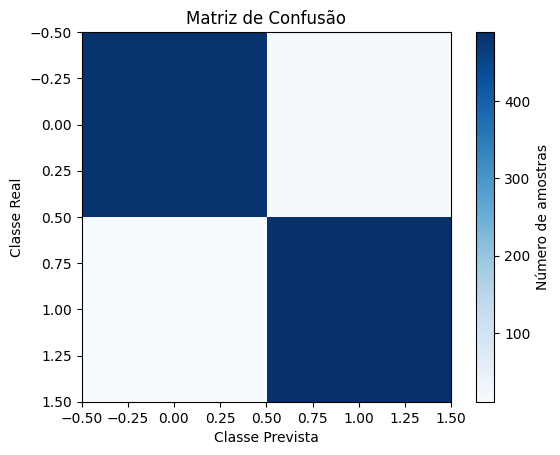

In [234]:
# Impressão visual
plt.imshow(matriz_confusao, cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.colorbar(label="Número de amostras")
plt.show()

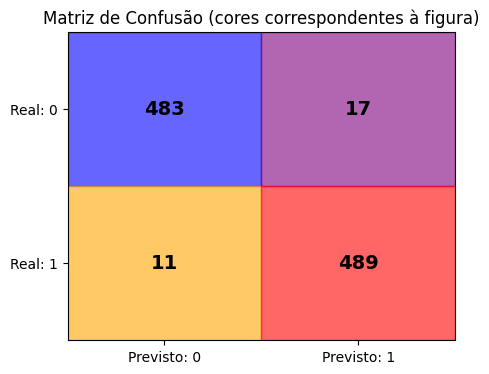

Matriz de confusão:
[[483  17]
 [ 11 489]]


In [239]:

def calcular_metricas(d, Y_pred):
    TP = np.sum((d == 1) & (Y_pred == 1))
    TN = np.sum((d == 0) & (Y_pred == 0))
    FP = np.sum((d == 0) & (Y_pred == 1))
    FN = np.sum((d == 1) & (Y_pred == 0))

    acc = (TP + TN) / len(d)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    #print(f"Acurácia: {acc:.4f}")
    return acc, precision, recall, f1

#correr a função
calcular_metricas(d, Y_pred)

matriz_confusao = np.array([[TN, FP],
                            [FN, TP]])

# Cores correspondentes à tua figura
cores = np.array([["#0000FF", "#800080"],   # azul, roxo
                  ["#FFA500", "#FF0000"]])  # laranja, vermelho

# Criar gráfico
fig, ax = plt.subplots(figsize=(5, 4))
for i in range(2):
    for j in range(2):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=cores[i, j], alpha=0.6))

# Adicionar valores numéricos
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.5, str(matriz_confusao[i, j]),
                va='center', ha='center', fontsize=14, color='black', weight='bold')

# Ajustes de eixos
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xticks([0.5, 1.5])
ax.set_yticks([0.5, 1.5])
ax.set_xticklabels(['Previsto: 0', 'Previsto: 1'])
ax.set_yticklabels(['Real: 0', 'Real: 1'])
ax.set_title("Matriz de Confusão (cores correspondentes à figura)")
plt.gca().invert_yaxis()
plt.grid(False)
plt.show()

print("Matriz de confusão:")
print(matriz_confusao)

In [ ]:
def treinarv2(X, d, alpha=1e-3, epocas=50):
    w0 = random.uniform(-0.5, 0.5)
    w1 = random.uniform(-0.5, 0.5)
    w2 = random.uniform(-0.5, 0.5)

    for _ in range(epocas):
        total_erro = 0
        for i, entrada in enumerate(X):
            s = w0 + w1 * entrada[0] + w2 * entrada[1]
            y = f(s)
            erro = d[i] - y
            total_erro += abs(erro)
            w0 += alpha * erro
            w1 += alpha * erro * entrada[0]
            w2 += alpha * erro * entrada[1]
        if total_erro == 0:
            break

    #previsao final
    Y_pred = []
    for entrada in X:
        s = w0 + w1 * entrada[0] + w2 * entrada[1]
        Y_pred.append(f(s))
    return np.array(Y_pred)

n_testes = 30
accs, precs, recs, f1s = [], [], [], []

for _ in range(n_testes):
    Y_pred = treinarv2(X, d, alpha=1e-5, epocas=10)
    acc, prec, rec, f1 = calcular_metricas(d, Y_pred)
    accs.append(acc)
    precs.append(prec)
    recs.append(rec)
    f1s.append(f1)

# Calcular as médias
acc_med = np.mean(accs)
prec_med = np.mean(precs)
rec_med = np.mean(recs)
f1_med = np.mean(f1s)
print (f"Médias após {n_testes} testes:")
print(f"Acurácia: {acc_med:.4f}")           
print(f"Precisão: {prec_med:.4f}")
print(f"Recall: {rec_med:.4f}")
print(f"F1-Score: {f1_med:.4f}")

Médias após 30 testes:
Acurácia: 0.7696
Precisão: 0.8228
Recall: 0.7148
F1-Score: 0.7504
